# Calculation of absorption of light in polymer solar cell

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

import scipy.constants
from matplotlib import ticker
import numpy as np

import oedes
from oedes.optical.spectra import *
from oedes.optical import *
from oedes.optical import test_materials

In [2]:
front_layers = [
    IsotropicLayer(1e-3, test_materials.Glass),
    IsotropicLayer(140e-9, test_materials.ITO),
    IsotropicLayer(40e-9, test_materials.PEDOT_PSS)]
back_layers = [
    IsotropicLayer(25e-9, test_materials.Al)
]

In [3]:
L=np.linspace(0,500e-9,200)

In [4]:
def absorption(L):
    active_layer = IsotropicLayer(L, test_materials.P3HT_PC61BM)
    layers = front_layers + [active_layer] + back_layers
    solution = NormalIncidence(layers, AM1_5, AM1_5.xdata)
    absorption_stack = [solution.R]
    by_layer = np.asarray([solution.R]+list(np.diff(solution.incident_power_by_layer[::-1]))[::-1]+[solution.T])/solution.illuminating_power()
    return dict(active_layer=solution.total_absorption_in_layer(active_layer),
               stack=by_layer,
               obj=solution,
               layers=layers)

In [5]:
result=[absorption(thickness) for thickness in L]

In [6]:
stack=np.asarray([r['stack'] for r in result])
a=np.asarray([r['active_layer'] for r in result])
oedes.testing.store(a)
oedes.testing.store(stack)

# Power absorbed by active layer

Text(0,0.5,'Power absorbed in active layer [W/m^2]')

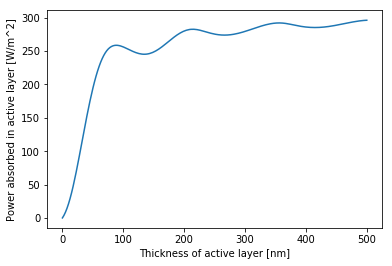

In [7]:
plt.plot(L*1e9,a)
plt.xlabel('Thickness of active layer [nm]')
plt.ylabel('Power absorbed in active layer [W/m^2]')

# Relative power absorbed by all layers

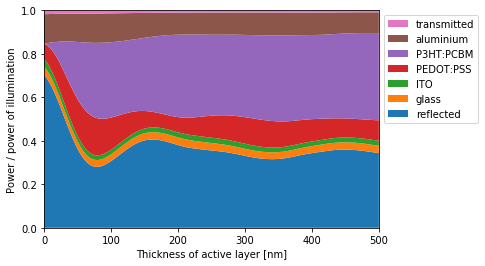

In [8]:
plt.stackplot(L*1e9, *stack.transpose(), labels=['reflected']+[layer.material.name for layer in result[0]['layers']] + ['transmitted'])
plt.xlabel('Thickness of active layer [nm]')
plt.ylabel('Power / power of illumination')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], loc="upper left", bbox_to_anchor=(1,1))
plt.autoscale(tight=True)